**Дьяконова Светлана Сергеевна ИУ5-21М**

Задача №1 (номер задачи 4): 

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Загрузка датасета
data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

In [4]:
data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,...,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,...,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,...,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,...,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,...,15,5,5,3,6,5,0,3,11,0


In [6]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Z_CostContact          0
Z_Revenue              0
AcceptedCmp            0
dtype: int64

In [7]:
# в данных отсутствуют пропуски
# кодирование будет применено к признаку "образование"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Education'])

In [8]:
# вывод уникальных значений для признака "образование", т.е. смотрим какие категории есть у данного признака
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
#просмотр классов кодирования
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [11]:
le.inverse_transform([0, 1, 2, 3,4])

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

Задача №2 (номер задачи 24):

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.



In [13]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

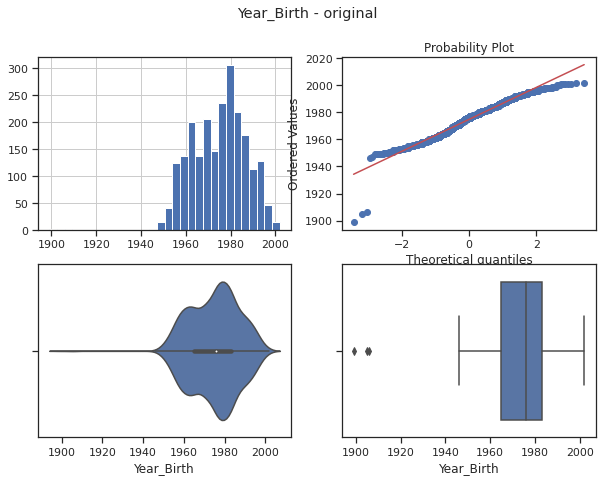

In [17]:
diagnostic_plots(data, 'Year_Birth', 'Year_Birth - original')

In [18]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [19]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary  

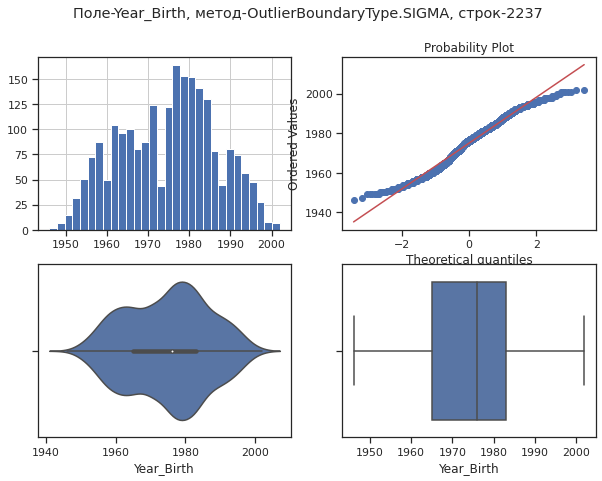

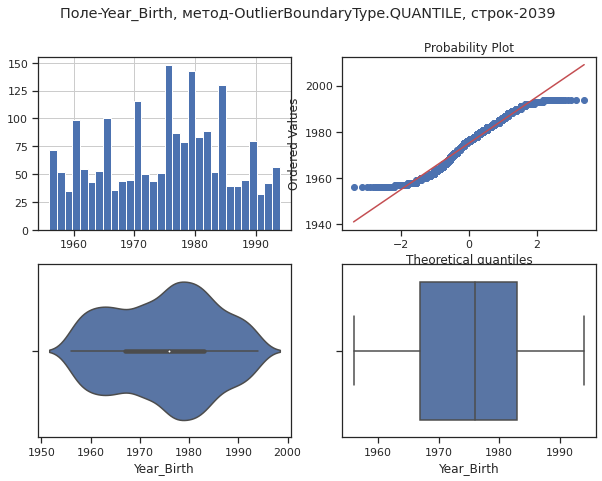

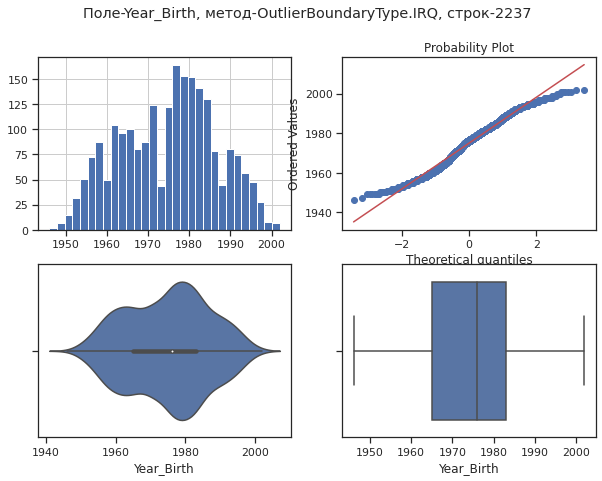

In [23]:
#удаление выбросов

for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, "Year_Birth", obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data["Year_Birth"] > upper_boundary, True, 
                                 np.where(data["Year_Birth"] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format("Year_Birth", obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, "Year_Birth", title)

Допольнительное задание:

Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

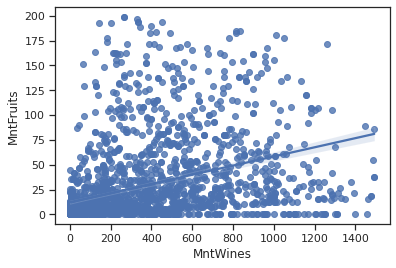

In [12]:
sns.regplot(x=data["MntWines"], y=data["MntFruits"])